### An implementation of a simple neural network

#### Data Loading

In [59]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
from data_loader import MnistDataloader
from IPython.display import display, clear_output

print("Loading dataset...")
mnist_dataloader = MnistDataloader()
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()
x_train_images = np.array(x_train[:1000]) # 60000 x 28 x 28
y_train = np.array(y_train[:1000]) # 60000
x_test_images = np.array(x_test[:1000])   # 10000 x 28 x 28
y_test = np.array(y_test[:1000])   # 10000

# Convert tensor to lower dimension and normalize
print("Reshaping dataset...")
x_train = x_train_images.reshape(x_train_images.shape[0], -1) # 60000 x 784
x_train = x_train / 255.0
x_test = x_test_images.reshape(x_test_images.shape[0], -1)    # 10000 x 784
x_test = x_test / 255.0

# Apply one-hot-coding to labels
y_train_hot = np.zeros((y_train.size, 10))
y_train_hot[np.arange(y_train.size), y_train] = 1   # 60000 x 10
y_test_hot = np.zeros((y_test.size, 10))
y_test_hot[np.arange(y_test.size), y_test] = 1      # 10000 x 10

Loading dataset...
Reshaping dataset...


#### Network Setup

In [60]:
# Construct network
print("Creating network...")
layer_1 = 128
layer_2 = 10
weights_1 = np.random.randn(x_train.shape[1], layer_1) * 0.01  # 784 x 128
biases_1 = np.zeros(layer_1)                                   # 128
weights_2 = np.random.randn(layer_1, layer_2) * 0.01    # 128 x 10
biases_2 = np.zeros(layer_2)
print("Done")

Creating network...
Done


#### Network Training

'Training 0 of 1000 done.'

[2.307673579167771, 2.3275539190168724, 2.3181369375277137, 2.3297271324593605, 2.331748665847675, 2.3271674243589633, 2.282101736056159, 2.3601316186806622, 2.2238202476855866, 2.305828539940978, 2.2958715642831624, 2.3218612138439254, 2.2158693725477905, 2.389337543961221, 2.199597761461086, 2.4103573652106776, 2.3309648968982075, 2.418037651436023, 2.340382210424922, 2.3579988347576335, 2.293857382731836, 2.3596982345312623, 2.3010088125526624, 2.210618769116565, 2.172698337975529, 2.3221087040938073, 2.2892498760800155, 2.225941951357144, 2.253812608542004, 2.4134656501933858, 2.1718335124869927, 2.445173992869501, 2.3677346078776775, 2.322148841925647, 2.4045062953846994, 2.3934613935864353, 2.3258740895037953, 2.2832022122384057, 2.4201521503620342, 2.2356314247139686, 2.210046600904871, 2.41159114595605, 2.3578045459788446, 2.3030235865314905, 2.236119024020339, 2.255153935630331, 2.3705985172457718, 2.4113380004409573, 2.2525884165689294, 2.1810686567308264, 2.0740405654762575,

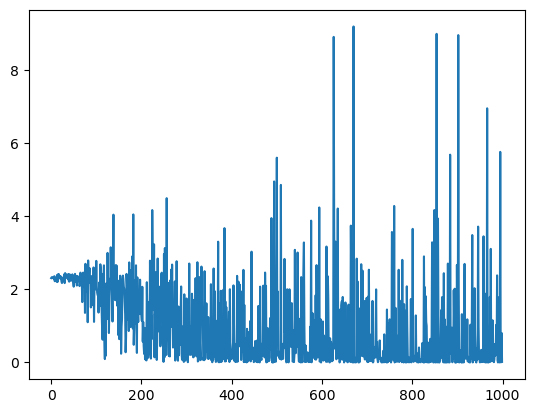

In [61]:
# ReLU activation function
def relu(vector):
    return np.maximum(0, vector)


# Derivative function of ReLU
def relu_derivative(x):
    return (x > 0).astype(float)


# Softmax activation function
def softmax(vector):
    exp_vector = np.exp(vector)
    return exp_vector / np.sum(exp_vector)


# Cross entropy loss function
def ce_loss(output_vector, label_vector):
    return -np.sum(label_vector * np.log(output_vector))

# Run network
learning_rate = 0.05
losses = []
for index in range(x_train.shape[0]):
    if index % 1000 == 0:
        clear_output(wait=True)
        display(f"Training {index} of {x_train.shape[0]} done.")

    # Forward pass
    output_1 = relu(np.dot(x_train[index], weights_1) + biases_1)
    output_2 = softmax(np.dot(output_1, weights_2) + biases_2)
    losses.append(ce_loss(output_2, y_train_hot[index]))

    # Backward pass
    d_output_2 = output_2 - y_train_hot[index]  # Combined derivative of softmax and ce loss
    d_loss_weights_2 = np.outer(output_1, d_output_2)
    d_output_1 = np.dot(weights_2, d_output_2) * relu_derivative(output_1)
    d_loss_weights_1 = np.outer(x_train[index], d_output_1)

    weights_2 -= learning_rate * d_loss_weights_2
    biases_2 -= learning_rate * d_output_2
    weights_1 -= learning_rate * d_loss_weights_1
    biases_1 -= learning_rate * d_output_1

print(losses)
plt.plot(losses)
print("Done")

#### Test Network

[0.00018158923856680982, 0.5895597503963219, 0.010816814906914437, 0.011826978181795364, 0.09661863304243291, 0.010041716946899764, 1.7136504204195828, 1.2606868957895372, 4.470091568710521, 4.959878753358552, 1.78314065163526, 1.8577935339311915, 2.0377798600675816, 0.02699281501554237, 0.009614058395651914, 1.3702918717803496, 2.0977478599666433, 0.0004670201106670437, 0.7604428031417473, 0.5559870463804355, 4.879989722938099, 0.14980938625004656, 1.4295757046698174, 0.89062816163659, 0.587401859946993, 0.0028647356315115546, 0.008563371412097905, 0.08360066861527912, 0.020558607756719846, 0.06251843651484543, 0.0069325744568270765, 0.24406773611273969, 0.009479313207506715, 0.9233332141392921, 0.0023533520658845677, 0.08946296475721938, 0.0011992786647800503, 0.015285609408273301, 0.747909308777162, 0.004785980680085956, 0.06917782202293217, 0.005746970162786513, 1.7782942053426791, 0.3652310947655247, 0.3899036814624048, 3.0676926810353473, 1.7294052289217279, 0.22128064012683546, 

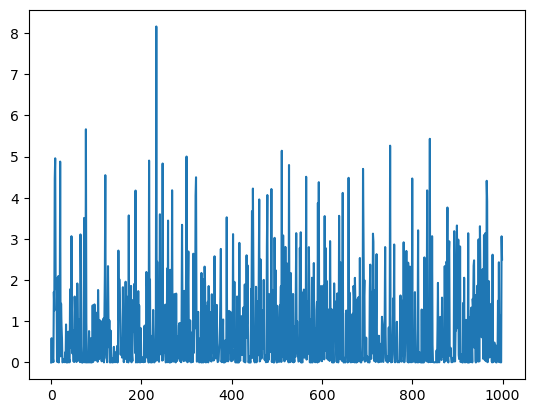

In [65]:
test_outputs = []
test_losses = []
for index in range(x_test.shape[0]):
    output_1 = relu(np.dot(x_test[index], weights_1) + biases_1)
    output_2 = softmax(np.dot(output_1, weights_2) + biases_2)
    loss = ce_loss(output_2, y_test_hot[index])
    test_outputs.append(output_2)
    test_losses.append(loss)

print(test_losses)
plt.plot(test_losses)

Index of max value: 233
[3.23223652e-06 4.72875343e-07 3.11389278e-07 1.56367872e-06
 3.91468052e-07 1.93733537e-06 2.74245573e-08 9.99818427e-01
 2.04561916e-06 1.71590725e-04]
7


<BarContainer object of 10 artists>

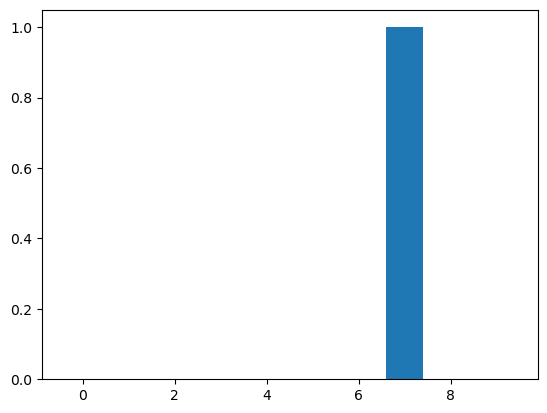

In [ ]:
# Print max value index
max_index = test_losses.index(max(test_losses))
print("Index of max value:", max_index)

# Print accuracy
hits = [test_outputs.index(max(test_outputs[index])) == y_test[index] for index in range(len(x_test))]
print("Accuracy:", sum(hits) / len(hits))

# Plotting the bar chart
print(test_outputs[0])
print(y_test[0])
plt.bar(range(len(test_outputs[0])), test_outputs[0])

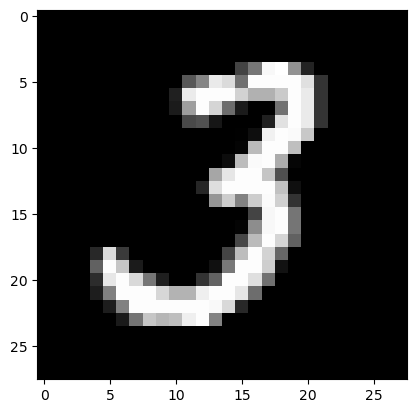

In [64]:
plt.imshow(x_train_images[321], cmap=plt.cm.gray)